# SVM classifier 

- Breast Cancer Dataset (In-built)

### Step 1: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

### Step 2: Load and prepare the dataset


In [2]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

### Step 3: Split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)


### Step 4: Feature scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5: Train an SVM classifier

In [32]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### Step 6: Make predictions

In [76]:
y_pred = svm_classifier.predict(X_test)


### Step 7: Evaluate the model

In [77]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

### Step 8: Visualize results using PCA

In [78]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [79]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

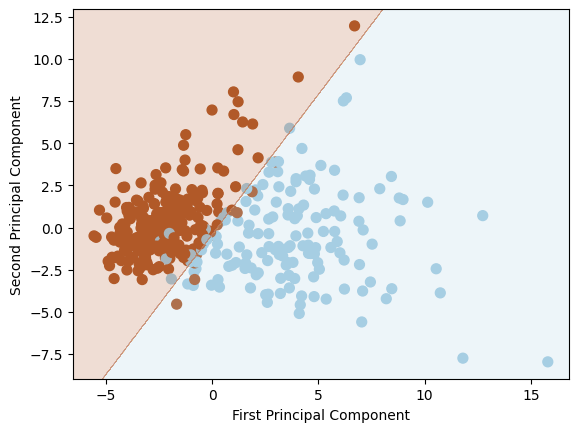

In [80]:
# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [81]:
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z.shape

(1280128,)

In [82]:
Z = Z.reshape(xx.shape)
Z.shape

(1096, 1168)

In [83]:
xx.ravel()

array([-6.56240961, -6.54240961, -6.52240961, ..., 16.73759039,
       16.75759039, 16.77759039])

In [84]:
yy.ravel()

array([-8.95785856, -8.95785856, -8.95785856, ..., 12.94214144,
       12.94214144, 12.94214144])

In [85]:
np.c_[xx.ravel(),yy.ravel()]

array([[-6.56240961, -8.95785856],
       [-6.54240961, -8.95785856],
       [-6.52240961, -8.95785856],
       ...,
       [16.73759039, 12.94214144],
       [16.75759039, 12.94214144],
       [16.77759039, 12.94214144]])

In [86]:
pca.inverse_transform(np.c_[xx.ravel(),yy.ravel()])

array([[ 0.73149553, -0.22066159,  0.51720009, ..., -1.6062715 ,
        -2.10611934, -3.40416695],
       [ 0.73581358, -0.2186725 ,  0.5216961 , ..., -1.60121329,
        -2.10362654, -3.40139991],
       [ 0.74013163, -0.21668342,  0.5261921 , ..., -1.59615509,
        -2.10113375, -3.39863287],
       ...,
       [ 0.5098128 ,  1.04048211,  0.8839878 , ...,  4.1559138 ,
         3.94731009,  5.92220454],
       [ 0.51413085,  1.0424712 ,  0.8884838 , ...,  4.16097201,
         3.94980289,  5.92497158],
       [ 0.5184489 ,  1.04446028,  0.89297981, ...,  4.16603021,
         3.95229568,  5.92773862]])

### Step 9: Print results

In [87]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[ 61   3]
 [  0 107]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.97      1.00      0.99       107

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

